In [27]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [28]:
def get_best_param_by_normal_equation_method(input_var, output_var, max_poly_deg=1):
    """
    Normal equation method
    """
    # preparing input matrix by polynomial degree
    input_var = prepare_matrix(input_var, max_poly_deg)

    # normal equation
    # theta_best = (X.T * X)^(-1) * X.T * y
    input_var_transpose = input_var.T
    best_params = inv(input_var_transpose.dot(input_var)).dot(input_var_transpose).dot(output_var)

    # best model
    y_hat = np.matmul(best_params, input_var.T)

    return best_params, input_var, y_hat

def prepare_matrix(input_var, max_poly_deg):
    m = len(input_var)
    x_bias = np.ones((m, 1))
    x = np.reshape(input_var, (m, 1))
    updated_x = np.append(x_bias, x, axis=1)

    for i in range(2, max_poly_deg+1):
        updated_x = np.append(updated_x, np.power(x, i), axis=1)

    return updated_x

def plot_prediction(x, y, w):
    plt.plot(x, y, color='green')

    updated_x = prepare_matrix(x, len(w)-1)
    y_hat = np.matmul(w, updated_x.T)

    plt.plot(x, y_hat, color='red')
    plt.show()
    
    
def compute_cost(input_var, output_var, weights):
    # find the squared error over the whole training set
    sum = 0
    for x_i, y_i in zip(input_var, output_var):
        y_hat = np.dot(weights, x_i)
        sum += (y_hat - y_i) ** 2

    return sum / (len(input_var) * 2)


def multivariate_gradient_descent(input_var, output_var, max_poly_deg=1, alpha=1e-1, max_itr=100000):
    """
    Gradient Descent method
    """
    # preparing input matrix by polynomial degree
    input_var = prepare_matrix(input_var, max_poly_deg)

    # initialize the weight and x_vectors
    w = [0 for index in range(0, len(input_var[0]))]

    # Init error
    prev_error = compute_cost(input_var, output_var, w)

    itr = 0
    while itr < max_itr:

        # calculate new better waits
        for x_i, y_i in zip(input_var, output_var):
            y_hat = np.dot(w, x_i)
            gradient_w = x_i.dot(y_i - y_hat)
            w += alpha * gradient_w / len(input_var)

        # calculate new error
        error = compute_cost(input_var, output_var, w)

        # if new error is bigger or the same as previous error the you found the best waits
        if error >= prev_error:
            # best model
            y_hat = np.matmul(w, input_var.T)
            return w, input_var, y_hat
        else:
            prev_error = error

        itr += 1

    # best model
    y_hat = np.matmul(w, input_var.T)
    return w, input_var, y_hat    

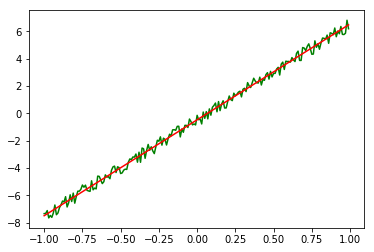

In [29]:
'''Linear Regression when degree of polynomial is one'''
max_poly_deg = 1

x = np.load('x_train_1.npy')
y = np.load('y_train_1.npy')

best_params, input_var, y_hat = get_best_param_by_normal_equation_method(x, y, max_poly_deg)

plot_prediction(x, y, best_params)

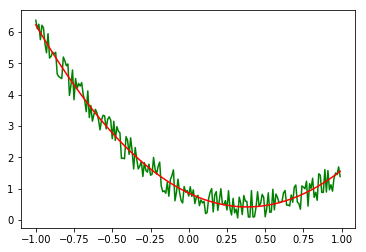

In [30]:
"""Linear Regression when degree of polynomial is two"""
max_poly_deg = 2

x = np.load('x_train_2.npy')
y = np.load('y_train_2.npy')

best_params, input_var, y_hat = get_best_param_by_normal_equation_method(x, y, max_poly_deg)

plot_prediction(x, y, best_params)


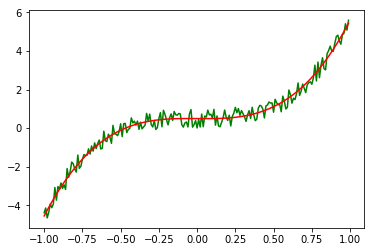

In [31]:
"""Linear Regression when degree of polynomial is three"""
max_poly_deg = 3

x = np.load('x_train_3.npy')
y = np.load('y_train_3.npy')

best_params, input_var, y_hat = get_best_param_by_normal_equation_method(x, y, max_poly_deg)

plot_prediction(x, y, best_params)


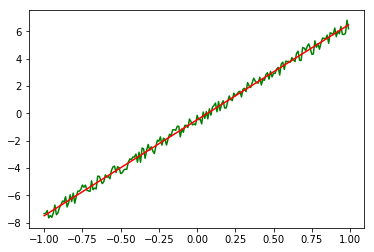

In [32]:
'''Linear Regression when degree of polynomial is one'''
max_poly_deg = 1

x = np.load('x_train_1.npy')
y = np.load('y_train_1.npy')

best_params, input_var, y_hat = multivariate_gradient_descent(x, y, max_poly_deg)

plot_prediction(x, y, best_params)

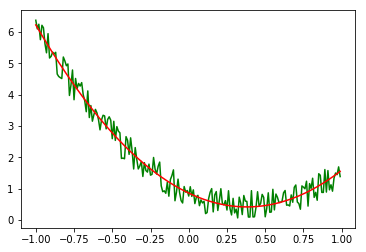

In [33]:
'''Linear Regression when degree of polynomial is one'''
max_poly_deg = 2

x = np.load('x_train_2.npy')
y = np.load('y_train_2.npy')

best_params, input_var, y_hat = multivariate_gradient_descent(x, y, max_poly_deg)

plot_prediction(x, y, best_params)


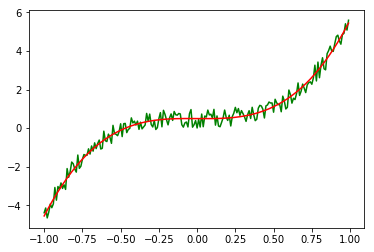

In [34]:
'''Linear Regression when degree of polynomial is one'''
max_poly_deg = 3

x = np.load('x_train_3.npy')
y = np.load('y_train_3.npy')

best_params, input_var, y_hat = multivariate_gradient_descent(x, y, max_poly_deg)

plot_prediction(x, y, best_params)